# Tap du lieu huan luyen mau 

In [6]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.rand(m,1)

[]

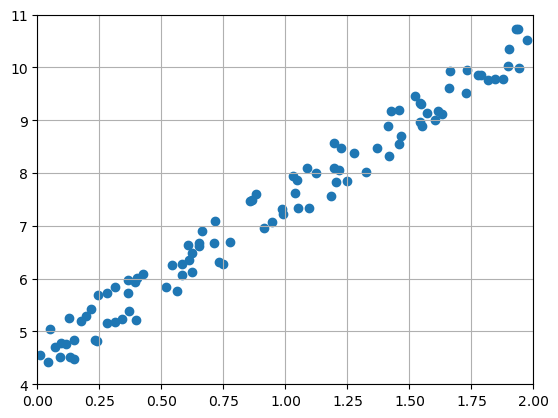

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlim([0,2])
plt.ylim([4,11])
plt.grid('True')
plt.plot()

In [15]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

In [17]:
theta_best = np.linalg.inv( X_b.T @ X_b ) @ X_b.T @ y

In [18]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [19]:
from sklearn.linear_model import LinearRegression # Signular Value Decomposition

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [20]:
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

# Batch Gradient Descent 

In [21]:
# gradient vector of the cost function : 2/m X.T @ (X @ theta - y )

In [22]:
eta = 0.1
n_epochs = 1000

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y )
    theta = theta - gradients * eta


In [27]:
theta

array([[4.51359766],
       [2.98323418]])

# Stochastic Gradient Descent

In [31]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ ( xi @ theta - yi )
        eta = learning_schedule(epoch * m + iteration)
        print(eta)
        theta = theta - eta * gradients

0.1
0.09803921568627451
0.09615384615384616
0.09433962264150944
0.09259259259259259
0.09090909090909091
0.08928571428571429
0.08771929824561403
0.08620689655172414
0.0847457627118644
0.08333333333333333
0.08196721311475409
0.08064516129032258
0.07936507936507936
0.078125
0.07692307692307693
0.07575757575757576
0.07462686567164178
0.07352941176470588
0.07246376811594203
0.07142857142857142
0.07042253521126761
0.06944444444444445
0.0684931506849315
0.06756756756756757
0.06666666666666667
0.06578947368421052
0.06493506493506493
0.0641025641025641
0.06329113924050633
0.0625
0.06172839506172839
0.06097560975609756
0.060240963855421686
0.05952380952380952
0.058823529411764705
0.05813953488372093
0.05747126436781609
0.056818181818181816
0.056179775280898875
0.05555555555555555
0.054945054945054944
0.05434782608695652
0.053763440860215055
0.05319148936170213
0.05263157894736842
0.052083333333333336
0.05154639175257732
0.05102040816326531
0.050505050505050504
0.05
0.04950495049504951
0.04901960

In [32]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [35]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [39]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

# Polynomial Regression

In [41]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)

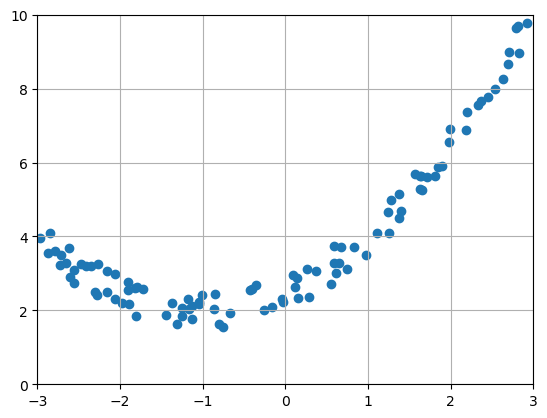

In [43]:
plt.scatter(X,y)
plt.xlim([-3,3])
plt.ylim([0,10])
plt.grid('True')
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [45]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.9943591 , 0.49967213]]))

In [53]:
x_new = np.array([[1,1],[2,4]])
y_pred = lin_reg.predict(x_new)

In [54]:
y_pred

array([[3.99189835],
       [6.48527383]])